# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv("/content/insurance.csv")

# Preprocessing

In [6]:
encode=LabelEncoder()

In [7]:
df["sex"]=encode.fit_transform(df["sex"])
df["smoker"]=encode.fit_transform(df["smoker"])
df["region"]=encode.fit_transform(df["region"])

In [8]:
df=df[df["charges"]<50000]

In [9]:
df=df[df["bmi"]<47]

In [10]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
labels=gm.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


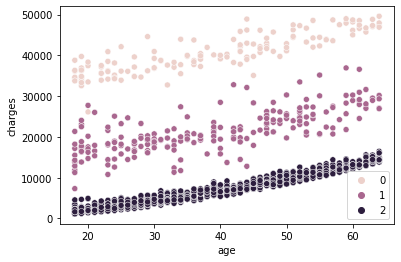

In [11]:
sns.scatterplot(df["age"],df["charges"],hue=labels)

In [12]:
df["labels"]=labels

In [13]:
group1=df[df["labels"]==2]
group2=df[df["labels"]==0]
group3=df[df["labels"]==1]

In [14]:
group1=group1.drop("labels",axis=1)
group2=group2.drop("labels",axis=1)
group3=group3.drop("labels",axis=1)

In [15]:
print(group1.shape)
print(group2.shape)
print(group3.shape)

(959, 7)
(141, 7)
(223, 7)


In [16]:
group2=group2[(group2["charges"]<34900) & (group2["charges"]>10000)]

In [17]:
x=group1.drop("charges",axis=1)
y=group1["charges"]

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y)

x=group2.drop("charges",axis=1)
y=group2["charges"]

xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y)

x=group3.drop("charges",axis=1)
y=group3["charges"]

xtrain3,xtest3,ytrain3,ytest3=train_test_split(x,y)

In [18]:
es=EarlyStopping(patience=20)

In [27]:
def Model(charges, n, xtrain, xtest, ytrain, ytest):
  model= Sequential()

  model.add(Dense(16, activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(16, activation="relu"))
  model.add(Dense(1))

  model.compile(loss="mse", optimizer="adam", metrics=["mae"])

  model.fit(xtrain,ytrain, validation_split=.1, callbacks=EarlyStopping(patience=n), epochs=2000)
  hist=pd.DataFrame(model.history.history)

  hist[["mae", "val_mae"]].plot()
  sns.lineplot(y=[charges for p in range(len(hist))], x=range(len(hist)))
  sns.lineplot(y=[sum(charges)/len(charges) for p in range(len(hist))], x=range(len(hist)))
  plt.legend(["mae","val_mae","min","mean"])

  model.save("first.h5")

Epoch 1/2000
21/21 [==============================] - 1s 12ms/step - loss: 65391356.0000 - mae: 7097.4893 - val_loss: 61087736.0000 - val_mae: 6795.7100
Epoch 2/2000
21/21 [==============================] - 0s 5ms/step - loss: 65262484.0000 - mae: 7089.4824 - val_loss: 60970668.0000 - val_mae: 6788.2378
Epoch 3/2000
21/21 [==============================] - 0s 4ms/step - loss: 65124208.0000 - mae: 7080.8525 - val_loss: 60802916.0000 - val_mae: 6777.6709
Epoch 4/2000
21/21 [==============================] - 0s 5ms/step - loss: 64887552.0000 - mae: 7066.4028 - val_loss: 60509752.0000 - val_mae: 6759.0698
Epoch 5/2000
21/21 [==============================] - 0s 4ms/step - loss: 64478332.0000 - mae: 7041.1206 - val_loss: 59990244.0000 - val_mae: 6726.0205
Epoch 6/2000
21/21 [==============================] - 0s 5ms/step - loss: 63749688.0000 - mae: 6995.6909 - val_loss: 59062620.0000 - val_mae: 6666.6626
Epoch 7/2000
21/21 [==============================] - 0s 5ms/step - loss: 62464328.0000

TypeError: ignored

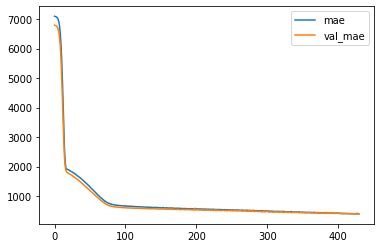

In [28]:
Model(group1["charges"],10,xtrain1,xtest1,ytrain1,ytest1)

In [ ]:
Model(10,xtrain2,xtest2,ytrain2,ytest2)